# Use Case for Hackathon

### We get a dataset, we have to understand it and get value from it

A school wants to hire us to see whether we are able to understand some problems they believe they are facing. 

Something is going wrong with the performance of the students but they are not able to figure it out and give reasons to it. 

Some parents are very disappointed of the grades of their kids and have complaint continiously to the board of the school. 

Our company is low on budget and we accept the deal even if it is risky, stressful and the money won't cover much of our runaway either but we take what we get. 

## Let's get to it and try to help the School!

### Import dataset and do the first general analysis

In [36]:
pip install pandasql

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.1 MB 1.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/2.1 MB 1.7 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.1 MB 1.7 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/2.1 MB 2.0 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/2.1 MB 1.9 MB/s eta 0:00:01
   ----------- ---------------------------- 0.6/2.1 MB 2.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.7/2.1 MB 2.1 MB/s eta 0:00:01



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import pandasql as pdsql

In [11]:
url='https://drive.google.com/file/d/1ETCwd-hUZ_qhQX0M0OY6OAddVE4bCSOW/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age
0,Male,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0
1,Female,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0
2,Male,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0
3,Male,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0
4,Male,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1010 non-null   object 
 1   race/ethnicity               1010 non-null   object 
 2   parental level of education  1010 non-null   object 
 3   lunch                        1010 non-null   object 
 4   test preparation course      1010 non-null   object 
 5   math score                   1010 non-null   int64  
 6   reading score                1010 non-null   int64  
 7   writing score                1010 non-null   int64  
 8   id_student                   1010 non-null   int64  
 9   address                      0 non-null      float64
 10  Year                         1010 non-null   int64  
 11  Age                          943 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 94.8+ KB


In [59]:
df

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age,gender_nbr,race_ethnicity_nbr
0,MALE,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0,1,1
1,FEMALE,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0,0,4
2,MALE,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0,1,5
3,MALE,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0,1,2
4,MALE,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,FEMALE,group D,high school,standard,none,63,77,76,1005,NaN,2023,16.0,0,4
1006,FEMALE,group A,bachelor's degree,standard,none,62,59,63,1006,NaN,2023,14.0,0,1
1007,MALE,group E,some college,standard,completed,93,88,100,1007,NaN,2023,17.0,1,5
1008,MALE,group D,high school,standard,none,63,56,65,1008,NaN,2023,15.0,1,4


In [ ]:
df = df.rename(columns = {'race/ethnicity':'race_ethnicity'})

In [58]:
df['gender_nbr'] =  pdsql.sqldf("SELECT CASE WHEN GENDER = 'MALE' THEN 1 WHEN GENDER = 'FEMALE' THEN 0 END AS GENDER_NBR FROM df")
df['race_ethnicity_nbr'] =  pdsql.sqldf("""SELECT CASE WHEN race_ethnicity = 'group A' THEN 1
            WHEN race_ethnicity = 'group B' THEN 2
            WHEN race_ethnicity = 'group C' THEN 3
            WHEN race_ethnicity = 'group D' THEN 4
            WHEN race_ethnicity = 'group E' THEN 5
            else 0
            END AS race_ethnicity_nbr
            FROM df""")
                                        

In [60]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Convertir las columnas categóricas a valores numéricos (Label Encoding)
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Mostrar las primeras filas
print(df_encoded.head())

   gender  race_ethnicity  parental level of education  lunch  \
0       1               0                            2      1   
1       0               3                            5      0   
2       1               4                            4      0   
3       1               1                            2      1   
4       1               4                            0      1   

   test preparation course  math score  reading score  writing score  \
0                        0          67             67             63   
1                        1          40             29             55   
2                        1          59             60             50   
3                        1          77             78             68   
4                        0          78             73             68   

   id_student  address  Year   Age  gender_nbr  race_ethnicity_nbr  
0        1000      NaN  2023  14.0           1                   1  
1        1001      NaN  2023  17.0    

In [64]:
df_encoded

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age,gender_nbr,race_ethnicity_nbr
0,1,0,2,1,0,67,67,63,1000,NaN,2023,14.0,1,1
1,0,3,5,0,1,40,29,55,1001,NaN,2023,17.0,0,4
2,1,4,4,0,1,59,60,50,1002,NaN,2023,14.0,1,5
3,1,1,2,1,1,77,78,68,1003,NaN,2023,17.0,1,2
4,1,4,0,1,0,78,73,68,1004,NaN,2023,16.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,0,3,2,1,1,63,77,76,1005,NaN,2023,16.0,0,4
1006,0,0,1,1,1,62,59,63,1006,NaN,2023,14.0,0,1
1007,1,4,4,1,0,93,88,100,1007,NaN,2023,17.0,1,5
1008,1,3,2,1,1,63,56,65,1008,NaN,2023,15.0,1,4


In [65]:
df_encoded.columns

Index(['gender', 'race_ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'address', 'Year', 'Age', 'gender_nbr',
       'race_ethnicity_nbr'],
      dtype='object')

In [20]:
df['gender'] = [str.upper(x) for x in df['gender']]

In [22]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    324
group D    265
group B    206
group E    134
group A     81
Name: count, dtype: int64

In [25]:
print(df['race/ethnicity'].value_counts())
print('\n')
print(df['parental level of education'].value_counts())
print('\n')
print(df['lunch'].value_counts())
print('\n')
print(df['test preparation course'].value_counts())


race/ethnicity
group C    324
group D    265
group B    206
group E    134
group A     81
Name: count, dtype: int64


parental level of education
some college          225
high school           206
associate's degree    204
some high school      192
bachelor's degree     113
master's degree        70
Name: count, dtype: int64


lunch
standard        659
free/reduced    351
Name: count, dtype: int64


test preparation course
none         672
completed    338
Name: count, dtype: int64


In [16]:
df[['gender','id_student']].groupby('gender').count()

,id_student
gender,
FEMALE,103
Female,46
MALE,97
Male,54
female,337
male,373


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'id_student', 'address', 'Year', 'Age'],
      dtype='object')

In [67]:
asd = df_encoded[['gender', 'race_ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Year', 'Age']].corr()

In [80]:
df_encoded['parental level of education'].value_counts()

parental level of education
4    225
2    206
0    204
5    192
1    113
3     70
Name: count, dtype: int64

In [82]:
import scipy.stats as stats

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['parental level of education'] == 0]['math score'],
    df[df['parental level of education'] == 1]['math score'],
    df[df['parental level of education'] == 2]['math score'],
    df[df['parental level of education'] == 3]['math score'],
    df[df['parental level of education'] == 4]['math score'],
    df[df['parental level of education'] == 5]['math score']
)

# Mostrar resultado
print(f"ANOVA F-Statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

ANOVA F-Statistic: nan, p-value: nan


C:\Users\vn55ysp\AppData\Local\Temp\ipykernel_4840\2838814184.py:4: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(


Text(0, 0.5, 'Frecuencia')

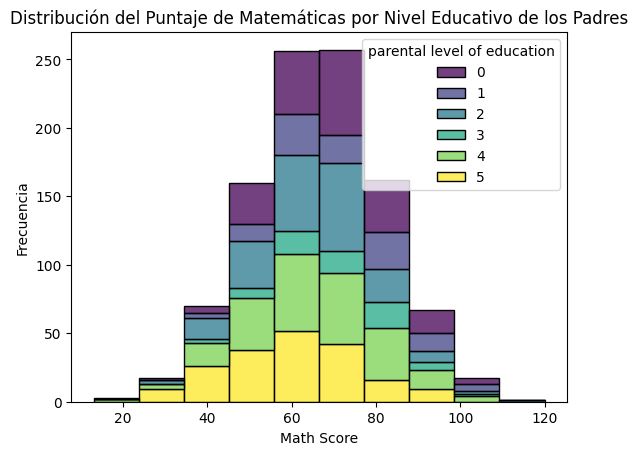

In [ ]:
sns.histplot(data=df_encoded, x='math score', hue='parental level of education', multiple="stack", bins=10, palette="viridis")

# Agregar título y etiqueta|s
plt.title("Distribución del Puntaje de Matemáticas por Nivel Educativo de los Padres")
plt.xlabel("Math Score")
plt.ylabel("Frecuencia")


In [88]:
df

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,id_student,address,Year,Age,gender_nbr,race_ethnicity_nbr
0,MALE,group A,high school,standard,completed,67,67,63,1000,NaN,2023,14.0,1,1
1,FEMALE,group D,some high school,free/reduced,none,40,29,55,1001,NaN,2023,17.0,0,4
2,MALE,group E,some college,free/reduced,none,59,60,50,1002,NaN,2023,14.0,1,5
3,MALE,group B,high school,standard,none,77,78,68,1003,NaN,2023,17.0,1,2
4,MALE,group E,associate's degree,standard,completed,78,73,68,1004,NaN,2023,16.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,FEMALE,group D,high school,standard,none,63,77,76,1005,NaN,2023,16.0,0,4
1006,FEMALE,group A,bachelor's degree,standard,none,62,59,63,1006,NaN,2023,14.0,0,1
1007,MALE,group E,some college,standard,completed,93,88,100,1007,NaN,2023,17.0,1,5
1008,MALE,group D,high school,standard,none,63,56,65,1008,NaN,2023,15.0,1,4


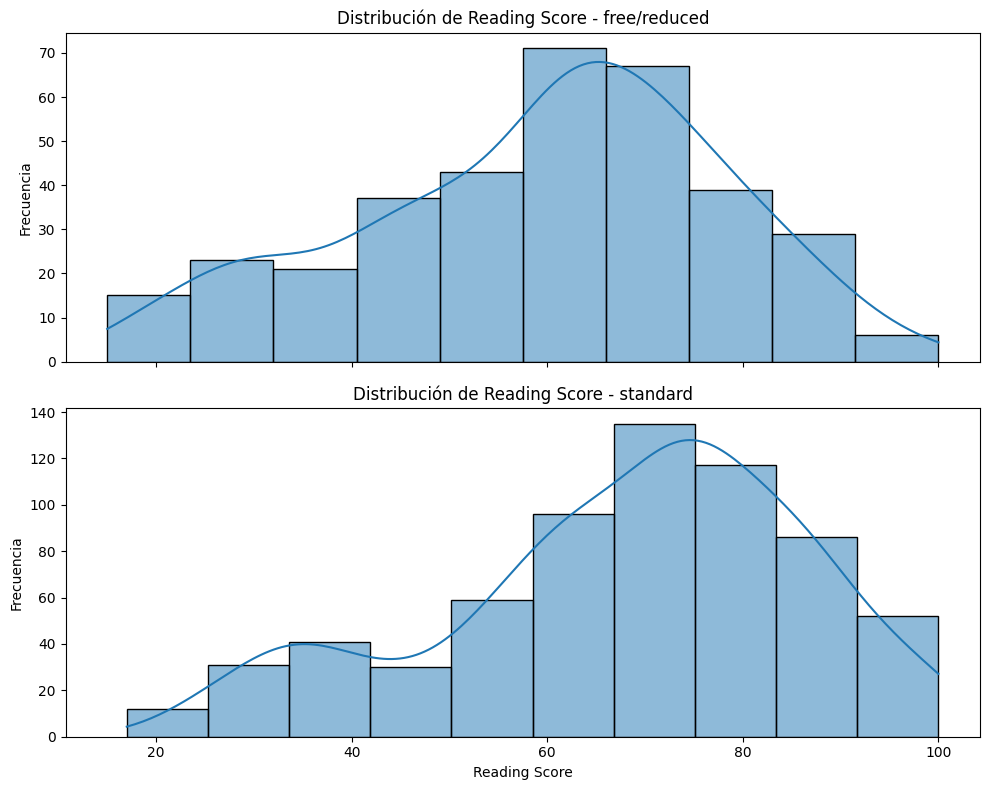

In [93]:
# Configurar el tamaño del gráfico con múltiples subgráficos
unique_levels = df['lunch'].sort_values().unique()
num_levels = len(unique_levels)

fig, axes = plt.subplots(num_levels, 1, figsize=(10, 4 * num_levels), sharex=True)

# Crear histogramas separados para cada nivel de educación de los padres
for i, level in enumerate(unique_levels):
    ax = axes[i]
    sns.histplot(df[df['lunch'] == level], x='reading score', bins=10, kde=True, ax=ax)
    ax.set_title(f"Distribución de Reading Score - {level}")
    ax.set_xlabel("Reading Score")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

In [94]:
def calcular_ratio_promedio(df, var_dependiente, var_independientes):
    """
    Calcula el promedio de la variable dependiente en cada nivel de las variables independientes
    y lo divide por el promedio total de la variable dependiente.

    Parámetros:
    df (DataFrame): El dataframe de entrada.
    var_dependiente (str): Nombre de la variable dependiente.
    var_independientes (list): Lista con nombres de variables independientes.

    Retorna:
    DataFrame con los valores de ratio por cada nivel de cada variable independiente.
    """
    # Calcular el promedio total de la variable dependiente
    promedio_total = df[var_dependiente].mean()

    # Crear un DataFrame para almacenar los resultados
    resultados = []

    # Calcular el ratio por cada nivel dentro de cada variable independiente
    for var in var_independientes:
        promedio_nivel = df.groupby(var)[var_dependiente].mean()
        ratio = promedio_nivel / promedio_total
        df_ratio = ratio.reset_index().rename(columns={var_dependiente: 'ratio'})
        df_ratio['variable'] = var  # Agregar la variable independiente a los resultados
        resultados.append(df_ratio)

    # Concatenar todos los resultados en un solo DataFrame
    df_final = pd.concat(resultados, ignore_index=True)

    return df_final

In [97]:
import pandas as pd

def calcular_ratio_pares_multiclase(df, var_dependiente, var_independientes):
    """
    Calcula el promedio de la variable dependiente en cada combinación de niveles
    de pares de variables independientes y lo divide por el promedio total.

    Parámetros:
    df (DataFrame): El dataframe de entrada.
    var_dependiente (str): Nombre de la variable dependiente.
    var_independientes (list): Lista de variables independientes.

    Retorna:
    DataFrame con el ratio de cada combinación de niveles respecto al promedio total.
    """
    # Calcular el promedio total de la variable dependiente
    promedio_total = df[var_dependiente].mean()

    # Lista para almacenar resultados
    resultados = []

    # Generar combinaciones de pares de variables independientes
    pares_vars = [(var1, var2) for i, var1 in enumerate(var_independientes) for var2 in var_independientes[i+1:]]

    # Calcular el ratio por cada combinación de variables independientes
    for var1, var2 in pares_vars:
        promedio_nivel = df.groupby([var1, var2])[var_dependiente].mean()
        ratio = promedio_nivel / promedio_total
        df_ratio = ratio.reset_index().rename(columns={var_dependiente: 'ratio'})
        df_ratio['variable_1'] = var1
        df_ratio['variable_2'] = var2
        resultados.append(df_ratio)

    # Concatenar todos los resultados en un solo DataFrame
    df_final = pd.concat(resultados, ignore_index=True)

    return df_final


In [95]:
calcular_ratio_promedio(df, 'math score', ['gender', 'race_ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'Age'])


,gender,ratio,variable,race_ethnicity,parental level of education,lunch,test preparation course,Age
0,FEMALE,0.951937,gender,NaN,NaN,NaN,NaN,NaN
1,MALE,1.044578,gender,NaN,NaN,NaN,NaN,NaN
2,NaN,0.981583,race_ethnicity,group A,NaN,NaN,NaN,NaN
3,NaN,0.952079,race_ethnicity,group B,NaN,NaN,NaN,NaN
4,NaN,0.949706,race_ethnicity,group C,NaN,NaN,NaN,NaN
5,NaN,1.042751,race_ethnicity,group D,NaN,NaN,NaN,NaN
6,NaN,1.121861,race_ethnicity,group E,NaN,NaN,NaN,NaN
7,NaN,1.047540,parental level of education,NaN,associate's degree,NaN,NaN,NaN
8,NaN,1.075071,parental level of education,NaN,bachelor's degree,NaN,NaN,NaN
9,NaN,0.985333,parental level of education,NaN,high school,NaN,NaN,NaN


In [99]:
pd.set_option('display.max_rows', 500)

In [101]:
df_2 = calcular_ratio_pares_multiclase(df, 'math score', ['gender', 'race_ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'Age'])

In [102]:
df_2.head()

,gender,race_ethnicity,ratio,variable_1,variable_2,parental level of education,lunch,test preparation course,Age
0,FEMALE,group A,0.980590,gender,race_ethnicity,NaN,NaN,NaN,NaN
1,FEMALE,group B,0.897785,gender,race_ethnicity,NaN,NaN,NaN,NaN
2,FEMALE,group C,0.914672,gender,race_ethnicity,NaN,NaN,NaN,NaN
3,FEMALE,group D,0.990842,gender,race_ethnicity,NaN,NaN,NaN,NaN
4,FEMALE,group E,1.064310,gender,race_ethnicity,NaN,NaN,NaN,NaN


In [103]:
df_2.sort_values('ratio')

,gender,race_ethnicity,ratio,variable_1,variable_2,parental level of education,lunch,test preparation course,Age
118,NaN,NaN,0.779124,parental level of education,lunch,some high school,free/reduced,NaN,NaN
43,NaN,group A,0.811630,race_ethnicity,parental level of education,some high school,NaN,NaN,NaN
68,NaN,group A,0.814157,race_ethnicity,lunch,NaN,free/reduced,NaN,NaN
22,FEMALE,NaN,0.823378,gender,lunch,NaN,free/reduced,NaN,NaN
72,NaN,group C,0.833375,race_ethnicity,lunch,NaN,free/reduced,NaN,NaN
70,NaN,group B,0.834721,race_ethnicity,lunch,NaN,free/reduced,NaN,NaN
163,NaN,NaN,0.843965,lunch,Age,NaN,free/reduced,NaN,17.0
157,NaN,NaN,0.853605,lunch,test preparation course,NaN,free/reduced,none,NaN
15,FEMALE,NaN,0.855126,gender,parental level of education,some high school,NaN,NaN,NaN
116,NaN,NaN,0.855656,parental level of education,lunch,some college,free/reduced,NaN,NaN


<Axes: >

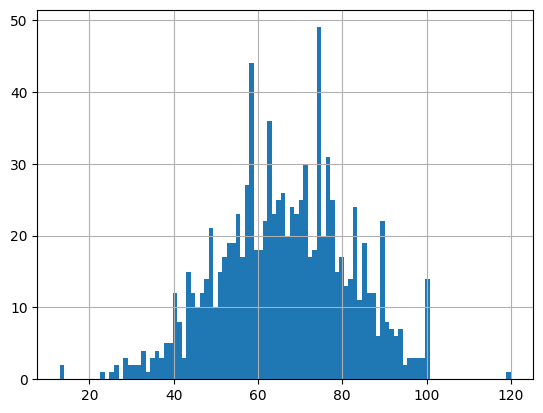

In [74]:
df['math score'].hist(bins = 100)

<Axes: >

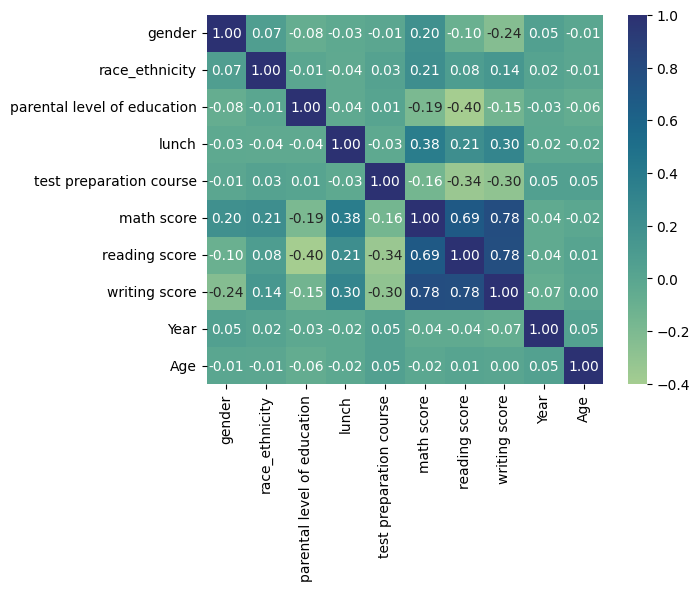

In [71]:
import seaborn as sns
sns.heatmap(asd, annot=True, fmt=".2f", cmap="crest")

In [2]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.8 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 639.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 991.0 kB/s eta 0:00:12
    --------------------------------------- 0.1/11.1 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/11.1 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.1 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/11.1 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.1 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/11.1 MB 3.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/11.1 MB 2.9 MB/s eta 0:00:04
   ----


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
df.corr()

NameError: name 'df' is not defined

## What information do we get from this? 

1. Why is student id int? If it is a string. It is not a number

2. We need to inspect all the object columns and check the value counts. What do we discover when we do it? 

3. The distribution of the year column is a bit odd. We need to look more into it. 

4. Do we have duplicates in the dataset?

5. All rows of the column address are missing, maybe we can just delete it

6. The age column has 77 missing values. What should we do with it? 

7. There seems to be values for the math scores higher than 120. Are those outliers? 

### 1. Change type of student id  

### 2. Explore the columns that are objects (string)

### 3. Seems that the column gender has a lot of versions we are going to have to fix this

### 4. What may be happening with the year? 

### 5. Do we have any duplicates? 

### 6.1. Missing values: Remember the column address

### 6.2. What about the missing values of the column Age? 

### 7. What is going on with the math scores?

## Do some initial plots? EDA

### What do you find interesting?  

- To me the reading score is really intriguing --> We need to really work on understanding what is going on
- The writing score is also characteristic but in principle I am not that worried about it. 

#### We know for a fact that the id_student and the year will not be relevant for any analysis as they are the same value for the whole dataset

Maybe we can delete them from now on

#### What do we care about? The grades are the main problem. Maybe they vary based on any of the other variables

I think we can detect the biggest discrepancies at 3-4 levels: 

- Parental level of education 

- Test preparation course 

- Mybe lunch or gender (I am pretty sure the lunch should not have that much impact but let's still check it)

Let's go deeper

 



### 2-variable Analysis with Lunch column 

### 2-variable Analysis with gender column 

### 2-variable Analysis with Test preparation course column 

### What is next?

- Get the story together
- Improve your code
- Get some statistics of the differences you want to show 
- Work on the plots to show the data nicely 
- Get the presentation ready 
- Show what you found to the client